# Algoritmos Genéticos
> O algoritmo completo se encontra no final do notebook, várias funções são criados no caminho.

### Gabriel Negreiros Lima

1. Implementar um algoritmo genético para resolver o problema de maximização da função Alpine 2

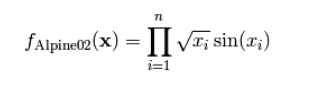

Nesta equação, n representa o número de dimensões e x_i pertencente a [0,10] para i = 1, ..., n. 

## Representação
Neste trabalho teremos n = 2, portanto:

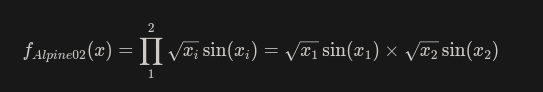

O Máximo Global da função é igual a `f(x^*)=2.808^n => f(x1,x2)=7.88`.

## Função *fitness*
A função de aptidão utilizada será `f_fit(x) = f(x) + 7.88`, que em módulo é o máximo e mínimo desta função, e desta forma não teremos resultados negativos na função *fitness*. Neste trabalho avaliaremos com 3 casas decimais.

In [2]:
import math
from random import randint
import numpy as np

def f_alpine02(x, y):
    return math.sqrt(x)*math.sin(x) * math.sqrt(y)*math.sin(y)

def f_fit(x, y):
    return round(f_alpine02(x, y) + 7.88, 3)

MAX_ALPINE = f_fit(7.917, 7.917) # 7.88 * 2
MAX_ALPINE

15.766

## População inicial

In [237]:
NUMBER_OF_INDIVIDUALS = 50
NUMBER_OF_PARENTS = int(NUMBER_OF_INDIVIDUALS/2)

x_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
y_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
population = np.zeros((NUMBER_OF_INDIVIDUALS,2))

for index, element in enumerate(x_s):
    x_s[index] = round(x_s[index], 3)
    y_s[index] = round(y_s[index], 3)
    population[index][0] = x_s[index]
    population[index][1] = y_s[index]

population

array([[2.892, 3.443],
       [3.976, 9.218],
       [1.234, 8.313],
       [6.859, 4.623],
       [8.006, 3.581],
       [8.298, 1.33 ],
       [9.228, 5.733],
       [1.177, 8.618],
       [9.661, 3.116],
       [9.63 , 5.128],
       [7.594, 6.18 ],
       [7.679, 9.829],
       [9.43 , 4.654],
       [6.551, 9.835],
       [5.429, 3.925],
       [6.679, 8.381],
       [7.826, 8.718],
       [1.508, 7.345],
       [9.259, 1.008],
       [3.064, 9.631],
       [7.927, 8.357],
       [3.795, 0.939],
       [1.586, 0.156],
       [4.226, 0.378],
       [2.535, 5.255],
       [4.026, 7.693],
       [4.644, 3.524],
       [2.185, 2.481],
       [1.635, 9.892],
       [0.514, 5.215],
       [2.437, 2.484],
       [8.175, 9.545],
       [9.548, 7.835],
       [2.568, 6.403],
       [5.682, 8.631],
       [1.158, 3.925],
       [1.187, 0.686],
       [5.27 , 7.171],
       [3.974, 5.508],
       [9.167, 1.882],
       [2.693, 4.603],
       [3.21 , 4.664],
       [7.822, 9.892],
       [1.4

## Seleção: roleta
Para fazer a seleção da roleta, iremos utilizar a função `f_fit` para gerar a roleta:

In [191]:
X_POS = 0 
Y_POS = 1

def roleta(population):
    sum_fitness = 0
    sum_by_individual = []
    temp = np.array([])                       # temporary to save the fitness
    number_of_rows, _ = population.shape      # population size
    fitnesses = np.zeros((number_of_rows,2))  # matrix with position and fitness of each one
    position = 0
    
    # saves all fitnesses and position of the individual
    for i in population:
        temp = f_fit(i[X_POS], i[Y_POS]) 
        fitnesses[position][0] = position
        fitnesses[position][1] = temp
        position += 1
    
    # sort by fitnesses
    fitnesses = fitnesses[fitnesses[:, 1].argsort()]
    
    for fit in fitnesses:
        sum_fitness += fit[1]  
        sum_by_individual.append([
            fit[0],
            sum_fitness
        ])   
            
    sum_fitness = int(sum_fitness * 1000)  # make it a integer to ease
    rand_value = randint(0, sum_fitness)   # randomizing
    
    #print(f"sum by individual with index: \n{sum_by_individual}")
    rand_value = float(rand_value / 1000)   # make it back to float
    sum_fitness = float(sum_fitness / 1000)
    
    
    # find the first element that has fitness sum greater than random
    #print(f"sum_fitness_total: {sum_fitness}")
    #print(f"rand_value: {rand_value}")
    for ind_with_sum  in sum_by_individual:
        if ind_with_sum[1] >= rand_value: 
            #print(f"index of the individual and fitness sum: {ind_with_sum}")
            #print(f"individual: {population[int(ind_with_sum[0])]}")
            return population[int(ind_with_sum[0])]
        
        
roleta(population)

array([2.674, 6.357])

Agora que temos a função roleta, podemos selecionar os pais da próxima geração. Para uma população definida na variável NUMBER_OF_INDIVIDUALS, elegemos a metade de casais que serão os pais, e então estes serão passados para o cruzamento. Como no exemplo abaixo.

In [6]:
def select_parents(population):
    
    parents = np.zeros((NUMBER_OF_PARENTS,2))
    for index in range(0,int(NUMBER_OF_PARENTS)):
        parents[index] = roleta(population)
    return parents
        
parents = select_parents(population)
parents

array([[9.279, 4.859],
       [0.311, 6.629],
       [6.51 , 3.702],
       [8.092, 8.582],
       [9.666, 4.589],
       [1.737, 1.287],
       [6.022, 3.065],
       [7.013, 6.844],
       [0.304, 5.839],
       [4.549, 4.999],
       [0.388, 4.523],
       [9.197, 5.533],
       [2.562, 3.806],
       [5.109, 5.427],
       [2.517, 7.633],
       [6.864, 3.764],
       [8.471, 2.803],
       [6.51 , 3.702],
       [2.431, 5.835],
       [9.156, 1.74 ],
       [8.353, 9.057],
       [1.165, 6.914],
       [2.562, 3.806],
       [3.743, 5.224],
       [1.218, 3.087],
       [2.279, 0.339],
       [2.925, 5.354],
       [8.471, 2.803],
       [6.508, 8.628],
       [3.36 , 5.95 ],
       [1.881, 6.089],
       [4.954, 2.882],
       [8.707, 5.879],
       [3.36 , 5.95 ],
       [8.864, 1.504],
       [7.216, 3.865],
       [1.433, 0.633],
       [9.212, 2.043],
       [7.013, 6.844],
       [3.743, 5.224],
       [4.077, 4.569],
       [0.304, 5.839],
       [2.562, 3.806],
       [3.7

## Operadores Genéticos
### Crossover de ponto único
Dados dois indivíduos, constituiremos um novo par de indivíduos

In [7]:
def crossover(parent_a, parent_b):
    children_a = [parent_a[0], parent_b[1]]
    children_b = [parent_b[0], parent_a[1]]
    
    return (children_a, children_b)

children_a, children_b = crossover(parents[0], parents[1])
print(children_a, children_b)

[9.279, 6.629] [0.311, 4.859]


### Mutação Gaussiana
Dado um indivíduo, realizar uma mudança local com um ajuste aleatório em ambas as posições:

In [207]:
def mutation(individual): 
    max_range_value = 2
    
    signal = randint(0, 3)  # 0 = + + | 1 = + - | 2 = - + | 3 = - - 
    delta_x = randint(0, max_range_value*1000)/1000 # same logic from roleta
    delta_y = randint(0, max_range_value*1000)/1000 
    
    probability = 5   # 0.5% 
    decisor = randint(1, 1000)
    
    if decisor <= probability:
        
        # signal choise
        if signal == 0:
            new_x = individual[0]+delta_x
            new_y = individual[1]+delta_y
        elif signal == 1:
            new_x = individual[0]+delta_x
            new_y = individual[1]-delta_y
        elif signal == 2:
            new_x = individual[0]-delta_x
            new_y = individual[1]+delta_y
        elif signal == 3:
            new_x = individual[0]-delta_x
            new_y = individual[1]-delta_y
        
        # boundaries
        if new_x > 10.0:
            new_x = 10.0
        elif new_x < 0:
            new_x = 0
        
        if new_y > 10.0:
            new_y = 10.0
        elif new_y < 0:
            new_y = 0
            
        return [round(new_x, 3), round(new_y, 3)]
    
    return individual

mutated = mutation(parents[4])
print(parents[4], mutated)

[9.666 4.589] [9.666 4.589]


## Mais algumas funções auxiliares
### Fitnesses para plots
Dada uma população, precisaremos do maior fitness, do menor, e do fitness médio para criar o gráfico de convergência.

In [33]:
def max_fitness(population):
    biggest = 0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit >= biggest: 
            chosen_x = individual[0]
            chosen_y = individual[1]
            biggest = fit
    
    return ([chosen_x, chosen_y], biggest)

max_fitness(population)

([7.95, 8.154], 15.536)

In [213]:
def mean_fitness(population):
    sum_value = 0.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        sum_value = sum_value + fit
        
    return sum_value / NUMBER_OF_INDIVIDUALS
    
mean_fitness(population)

8.19629

In [10]:
def min_fitness(population):
    minor = 10.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit <= minor:
            chosen_x = individual[0]
            chosen_y = individual[1]
            minor = fit
    
    return ([chosen_x, chosen_y], minor)

min_fitness(population)

([4.856, 7.834], 1.777)

## Algoritmo completo
Agora com as funções necessárias, montamos o algoritmo.

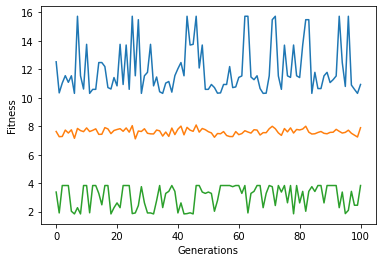

In [240]:
from matplotlib import pyplot as plt

max_gens = 100
actual_gen = 0 
difference = 10000
current_pop = population
new_gen = population
vector_best = []
vector_mean = []
vector_worst = []
vector_gen = []

while actual_gen <= max_gens and difference > 0.01:
    
    # Choose the best individual
    best_ind, best_fit = max_fitness(current_pop)
    vector_best.append(best_fit)
    
    mean_fit = mean_fitness(current_pop)
    vector_mean.append(mean_fit)
    
    worst_ind, worst_fit = min_fitness(current_pop)
    vector_worst.append(worst_fit)
    
    vector_gen.append(actual_gen)    
    
    for index in range(0, NUMBER_OF_PARENTS, 2):
        # selection
        parent_a = roleta(current_pop)
        parent_b = roleta(current_pop)
        #print(parent_a, parent_b, "\n-----")
        
        # crossover
        children_a, children_b = crossover(parent_a, parent_b)
        #print(children_a, children_b, "\n")
        
        # mutation (0.5%)
        children_a = mutation(children_a)
        children_b = mutation(children_b)
        
        new_gen[index] = children_a
        new_gen[index+1] = children_b
        
        #print(f"C_a: {children_a}, C_a: {children_b}")  
    
    #print(new_gen, "\n\n\n\n\n")
    #input('Press enter to continue: ')
    current_pop = new_gen
    difference = abs(best_fit - f_fit(7.917, 7.917))
    #print(f"melhor individuo: {best_ind}, fitness: {best_fit},\nfitness otimo: {f_fit(7.917, 7.917)}, geracao atual: {actual_gen}\n\n")
    actual_gen = actual_gen + 1

    
plt.plot(vector_gen, vector_best, label='best')
plt.plot(vector_gen, vector_mean, label='mean')
plt.plot(vector_gen, vector_worst, label='worst')
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.show()

# ToDo
- Plotar gráfico de convergência
  - Fitness do melhor
  - Fitness médio da população
  - Fitness do pior elemento